In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('departements.csv')
df.tail()

,Numéro,Département,Superficie,Population,Densité
96,971,Guadeloupe,1 628,397 990,244.4
97,972,Martinique,1 128,380 877,337.7
98,973,Guyane,83 534,259 865,3.1
99,974,La Réunion,2 504,850 727,339.8
100,976,Mayotte,376.00,256 518,682.2


In [53]:
df.dtypes

Numéro          object
Département     object
Superficie      object
Population      object
Densité        float64
dtype: object

In [54]:
df['Superficie'] = df['Superficie'].apply(lambda x: x.replace(' ', '')).astype('float')
df['Population'] = df['Population'].apply(lambda x: x.replace(' ', '')).astype('int')
df.tail()

,Numéro,Département,Superficie,Population,Densité
96,971,Guadeloupe,1628.0,397990,244.4
97,972,Martinique,1128.0,380877,337.7
98,973,Guyane,83534.0,259865,3.1
99,974,La Réunion,2504.0,850727,339.8
100,976,Mayotte,376.0,256518,682.2


In [55]:
df.dtypes

Numéro          object
Département     object
Superficie     float64
Population       int64
Densité        float64
dtype: object

In [56]:
df.describe()

,Superficie,Population,Densité
count,101.000000,1.010000e+02,101.000000
mean,6268.435644,6.578891e+05,551.934653
std,8033.080560,5.034570e+05,2391.346423
min,105.000000,7.630900e+04,3.100000
25%,4977.000000,2.866180e+05,51.200000
50%,5915.000000,5.331470e+05,87.000000
75%,6775.000000,8.215520e+05,175.600000
max,83534.000000,2.605238e+06,20934.400000


In [57]:
df[df['Densité']>10000]

,Numéro,Département,Superficie,Population,Densité
75,75,Paris,105.0,2206488,20934.4


In [58]:
np.arange(0, 500, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490])

In [59]:
bins = np.append(np.arange(0, 501, 10), [1000, 5000, 10000, 25000])
bins

array([    0,    10,    20,    30,    40,    50,    60,    70,    80,
          90,   100,   110,   120,   130,   140,   150,   160,   170,
         180,   190,   200,   210,   220,   230,   240,   250,   260,
         270,   280,   290,   300,   310,   320,   330,   340,   350,
         360,   370,   380,   390,   400,   410,   420,   430,   440,
         450,   460,   470,   480,   490,   500,  1000,  5000, 10000,
       25000])

In [60]:
df['dens_bins'] = pd.cut(x=df['Densité'], bins=bins)
df

,Numéro,Département,Superficie,Population,Densité,dens_bins
0,1,Ain,5762.0,631877,109.7,"(100, 110]"
1,2,Aisne,7369.0,538659,73.1,"(70, 80]"
2,3,Allier,7340.0,341613,46.5,"(40, 50]"
3,4,Alpes-de-Haute-Provence,6925.0,161799,23.4,"(20, 30]"
4,5,Hautes-Alpes,5549.0,140916,25.4,"(20, 30]"
...,...,...,...,...,...,...
96,971,Guadeloupe,1628.0,397990,244.4,"(240, 250]"
97,972,Martinique,1128.0,380877,337.7,"(330, 340]"
98,973,Guyane,83534.0,259865,3.1,"(0, 10]"
99,974,La Réunion,2504.0,850727,339.8,"(330, 340]"


In [61]:
df1 = df.loc[:, ['Population', 'dens_bins']].groupby(by='dens_bins').sum()
df1.head()

,Population
dens_bins,
"(0, 10]",259865
"(10, 20]",76309
"(20, 30]",748453
"(30, 40]",1749856
"(40, 50]",2803388


In [62]:
df2 = df1.reset_index()
df2.head()

,dens_bins,Population
0,"(0, 10]",259865
1,"(10, 20]",76309
2,"(20, 30]",748453
3,"(30, 40]",1749856
4,"(40, 50]",2803388


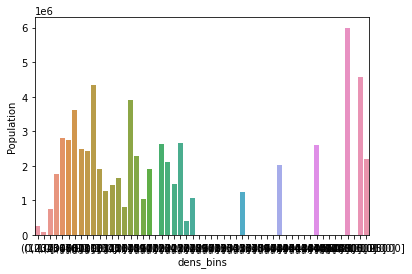

In [63]:
g = sns.barplot(x='dens_bins', y='Population', data=df2)